In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from d2l import torch as d2l
from matplotlib.ticker import MaxNLocator
d2l.use_svg_display()

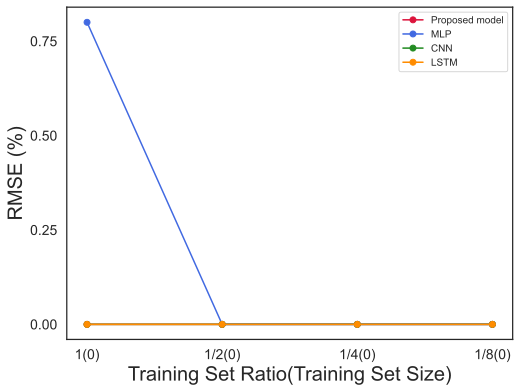

In [9]:
# def plot_training_ratio_vs_metric(y1, y2, y3, y4):
#     # 设置 seaborn 风格（移除了网格线）
#     sns.set(style="white")
    
#     # 横坐标：训练集占原始数据集的比例
#     x = [1, 1/2, 1/4, 1/8]
    
#     # 创建图形
#     plt.figure(figsize=(8, 6))
    
#     # 绘制四条折线（使用更深的颜色）
#     plt.plot(x, y1, marker='o', color='royalblue', label='Proposed')      # 原lightblue->royalblue
#     plt.plot(x, y2, marker='o', color='forestgreen', label='MLP')         # 原lightgreen->forestgreen
#     plt.plot(x, y3, marker='o', color='crimson', label='CNN')             # 原lightcoral->crimson
#     plt.plot(x, y4, marker='o', color='darkorange', label='LSTM')         # 原orange->darkorange

#     # 添加相邻点之间的差距标注（保持颜色同步修改）
#     def add_differences(x, y, color):
#         for i in range(len(x) - 1):
#             x1, x2 = x[i], x[i + 1]
#             y1, y2 = y[i], y[i + 1]
#             diff = y2 - y1
#             plt.text((x1 + x2) / 2, (y1 + y2) / 2, f'{diff:.4f}', 
#                     color=color, fontsize=9, ha='center', va='center',
#                     bbox=dict(facecolor='white', edgecolor=color, boxstyle='round,pad=0.2'))

#     # 为每条折线添加差距标注（颜色参数同步更新）
#     add_differences(x, y1, 'royalblue')
#     add_differences(x, y2, 'forestgreen')
#     add_differences(x, y3, 'crimson')
#     add_differences(x, y4, 'darkorange')

#     # 坐标轴设置保持不变
#     plt.xlabel('Training Set Ratio', fontsize=16)
#     plt.ylabel('RMSE (%)', fontsize=16)
#     plt.xticks(fontsize=14)
#     plt.yticks(fontsize=14)
    
#     # 保持原有的对数刻度设置
#     plt.xscale('log')
#     plt.xticks(x, ['1', '1/2', '1/4', '1/8'])
#     plt.gca().xaxis.set_major_locator(plt.FixedLocator(x))
#     plt.gca().xaxis.set_minor_locator(plt.NullLocator())
#     plt.gca().invert_xaxis()
    
#     # 显式关闭网格线（双重保障）
#     plt.grid(False)
    
#     # 添加图例
#     plt.legend()
    
#     # 显示图形
#     plt.show()
def plot_training_ratio_vs_metric(y1, y2, y3, y4,ways=[0,0,0,0],dataset_num=0):
    # 设置 seaborn 风格（移除了网格线）
    sns.set(style="white")
    
    # 横坐标：训练集占原始数据集的比例
    x = [1, 1/2, 1/4, 1/8]
    
    # 创建图形
    plt.figure(figsize=(8, 6))
    
    # 绘制四条折线（使用更深的颜色）
    plt.plot(x, y1, marker='o', color='crimson', label='Proposed model')
    plt.plot(x, y2, marker='o', color='royalblue', label='MLP')
    plt.plot(x, y3, marker='o', color='forestgreen', label='CNN')
  
    plt.plot(x, y4, marker='o', color='darkorange', label='LSTM')

    # 添加智能标注功能
    # def add_differences(x, y,color,way):
    #     # 获取当前坐标轴范围
    #     ymin, ymax = plt.gca().get_ylim()
    #     y_range = ymax - ymin
    #     threshold = y_range * 0.05  # 动态阈值：y轴范围的5%
    #     offset = y_range * 0.07    # 标注偏移量

    #     for i in range(len(x) - 1):
    #         x1, x2 = x[i], x[i+1]
    #         y1_val = y[i]
    #         y2_val = y[i+1]
    #         diff = y2_val - y1_val
    #         x_mid = (x1 + x2) / 2
    #         y_mid = (y1_val + y2_val) / 2

    #         # 根据差值大小选择标注方式
    #         if way==1:
    #             # 带引线的标注（向下偏移）
    #             # plt.annotate(f'{diff:.4f}', 
    #             #            xy=(x_mid, y_mid),
    #             #            xytext=(x_mid, y_mid - offset),
    #             #            arrowprops=dict(arrowstyle='->', color=color, lw=0.8),
    #             #            color=color, fontsize=16, ha='center', va='center',
    #             #            bbox=dict(facecolor='white', edgecolor=color, boxstyle='round,pad=0.2'))
    #             pass
    #         else:
    #             # 常规居中标注
    #             plt.text(x_mid, y_mid, f'+{diff:.4f}', 
    #                     color=color, fontsize=16, ha='center', va='center',
    #                     bbox=dict(facecolor='white', edgecolor=color, boxstyle='round,pad=0.2'))

    # # 为每条折线添加标注
    # add_differences(x, y1, 'royalblue',way=ways[0])
    # add_differences(x, y2, 'forestgreen',way=ways[1])
    # add_differences(x, y3, 'crimson',way=ways[2])
    # add_differences(x, y4, 'darkorange',way=ways[3])

    # 坐标轴设置
    plt.xlabel('Training Set Ratio(Training Set Size)', fontsize=20)
    plt.ylabel('RMSE (%)', fontsize=20)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    
    # 对数刻度设置
    plt.xscale('log')
    plt.xticks(x, [f'1({dataset_num})', f'1/2({dataset_num//2})', f'1/4({dataset_num//4})', f'1/8({dataset_num//8})'])
    plt.gca().xaxis.set_major_locator(plt.FixedLocator(x))
    plt.gca().xaxis.set_minor_locator(plt.NullLocator())
    plt.gca().invert_xaxis()
    ax = plt.gca()
    ax.yaxis.set_major_locator(MaxNLocator(nbins=4))
    # 显式关闭网格线
    plt.grid(False)
    
    # 添加图例
    plt.legend(fontsize=10)
    
    # 显示图形
    plt.show()


# 示例数据
y1 = [0, 0, 0, 0]
y2 = [0.8, 0, 0., 0]
y3 = [0., 0., 0., 0.]
y4 = [0, 0, 0, 0]

# 调用函数绘制图形
plot_training_ratio_vs_metric(y1, y2, y3, y4)


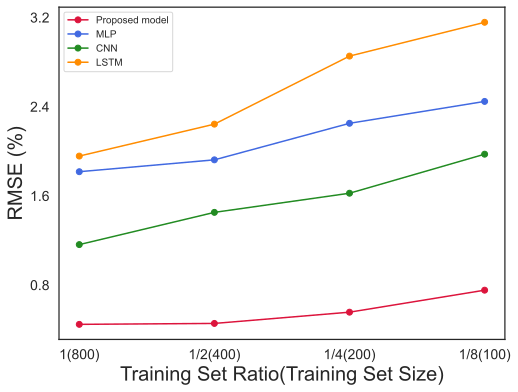

In [10]:
y1=[0.44769,0.45596,0.55695,0.7543]
y2=[1.8170,1.92351,2.25132,2.4475]
y3=[1.1632,1.4523,1.6241,1.9742]
y4=[1.95732,2.2437,2.8542,3.1573]
plot_training_ratio_vs_metric(y1, y2, y3, y4,dataset_num=800)


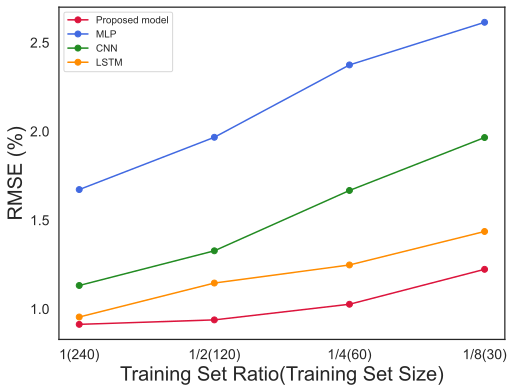

In [11]:
y1=[0.91321,0.93835,1.02645,1.22312]
y2=[1.6723,1.9667,2.3742,2.6142]
y3=[1.1321,1.3274,1.6672,1.9653]
y4=[0.9546,1.1458,1.2477,1.4362]
plot_training_ratio_vs_metric(y1, y2, y3, y4,dataset_num=240)

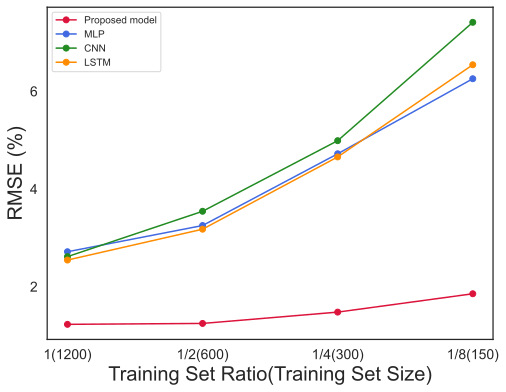

In [12]:
y1=[1.2280,1.2465,1.4785,1.8542]
y2=[2.7149,3.2516,4.7205,6.2572]
y3=[2.6149,3.5432,4.9887,7.4125]
y4=[2.5445,3.1762,4.6562,6.5431]
plot_training_ratio_vs_metric(y1, y2, y3, y4,[0,1,0,0],1200)

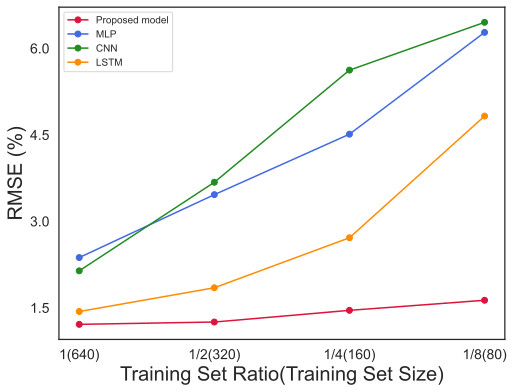

In [13]:
y1=[1.2132,1.2536,1.4563,1.6312]
y2=[2.3721,3.4635,4.5123,6.2781]
y3=[2.1415,3.6782,5.6231,6.4529]
y4=[1.4363,1.8482,2.7156,4.8264]
plot_training_ratio_vs_metric(y1, y2, y3, y4,[0,0,0,0],640)